In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data from tls_tree_static.npz
data = np.load('tls_tree_static.npz')

In [ ]:
data = np.load('tls_tree_static.npz')

points = data['pc_s']
is_leaf = data['classification_s']
object_ids = data['object_id_s']
src_ids = data['pt_src_id_s']

In [6]:
points = points[src_ids == 1]
is_leaf = is_leaf[src_ids == 1]
object_ids = object_ids[src_ids == 1]

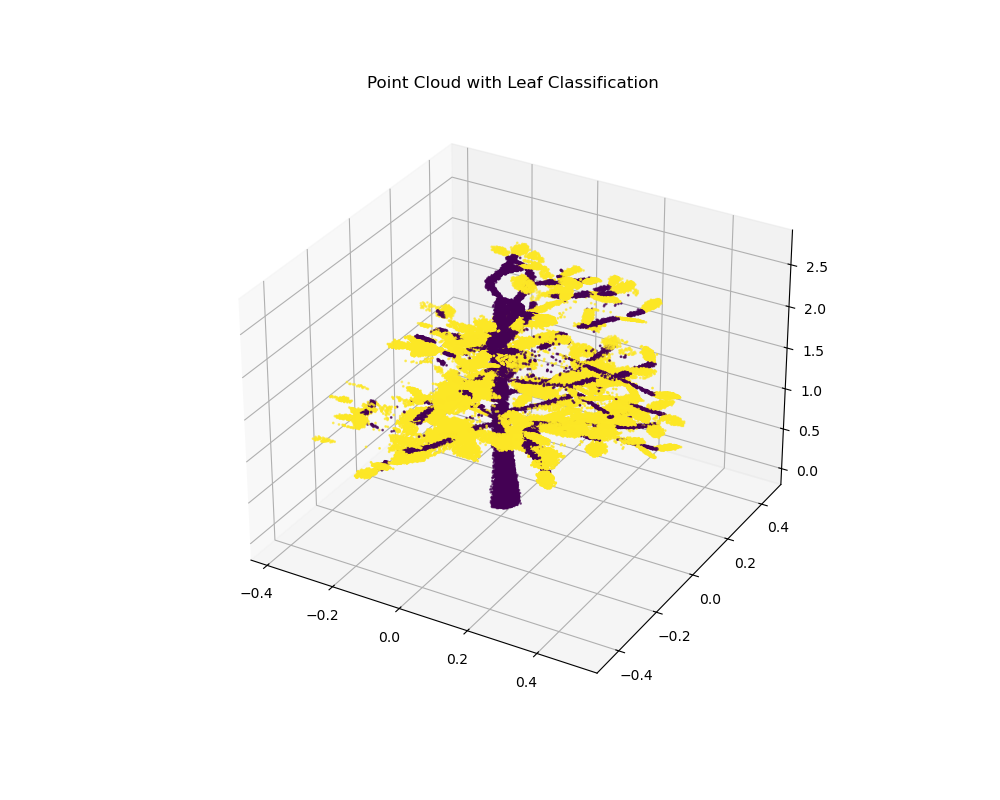

In [10]:
# plot the point cloud
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=is_leaf, cmap='viridis', s=1)
ax.set_title('Point Cloud with Leaf Classification')
plt.show()

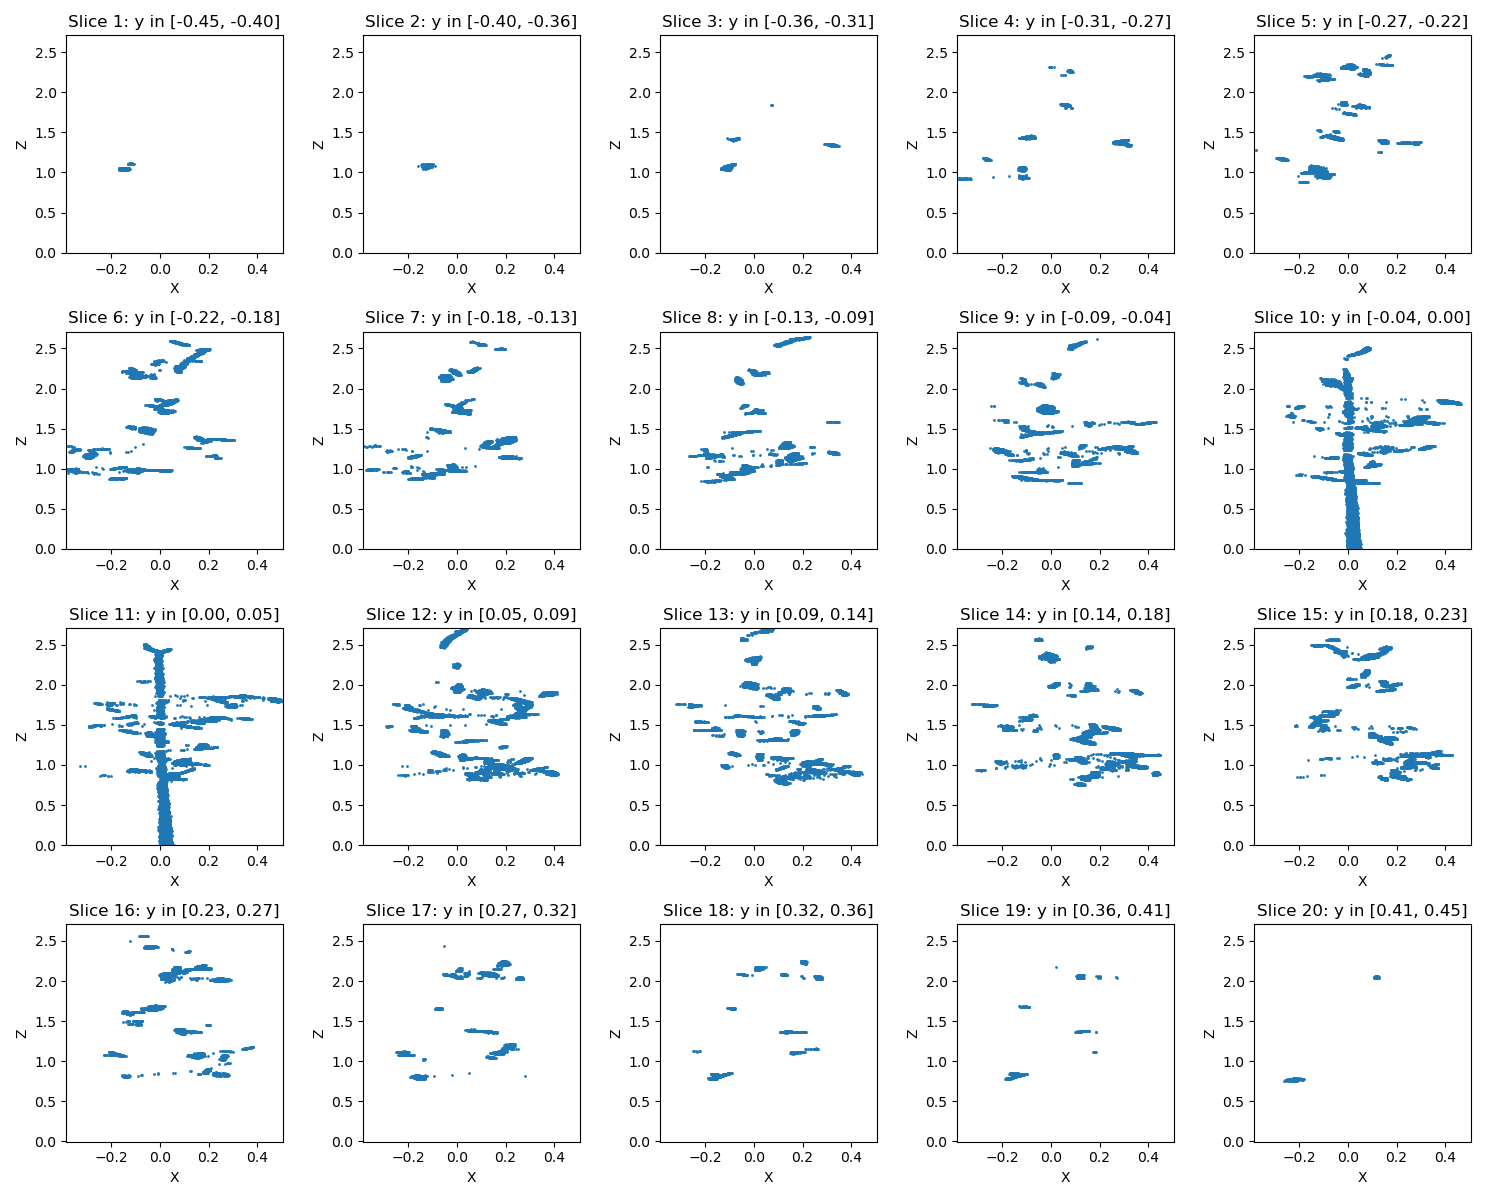

In [12]:
# make a ct scan along the y axis
y_min, y_max = points[:, 1].min(), points[:, 1].max()
num_slices = 20
slice_thickness = (y_max - y_min) / num_slices
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
for i in range(num_slices):
    y_lower = y_min + i * slice_thickness
    y_upper = y_lower + slice_thickness
    slice_points = points[(points[:, 1] >= y_lower) & (points[:, 1] < y_upper)]
    ax = axes[i // 5, i % 5]
    ax.scatter(slice_points[:, 0], slice_points[:, 2], s=1)
    ax.set_title(f'Slice {i+1}: y in [{y_lower:.2f}, {y_upper:.2f}]')
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_xlim(points[:, 0].min(), points[:, 0].max())
    ax.set_ylim(points[:, 2].min(), points[:, 2].max())
plt.tight_layout()
plt.show()